In [1]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv('dataset_s41524-018-0085-8.csv', low_memory=False)
df = pd.read_csv('selected.csv', low_memory=False)
dfwine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [3]:
feat_labels = df.columns[1:-1]


In [4]:
forest = RandomForestClassifier(n_estimators=500, random_state=1)

In [10]:
#X = df.iloc[:, 1:-1]
X = df.iloc[:, 4:24]
y = df.iloc[:, -1]

In [7]:
# T_sep 설정
# 논문 첫 부분에서 T_sep = 10(K)로 두고 설명
T_sep = 10

In [22]:
# T_sep보다 Tc가 높으면 1, 아니면 0
y = np.where(y > T_sep, 1, 0)

In [8]:
y

array([1, 1, 0, ..., 1, 1, 0])

In [11]:
# Dataset에서 85%는 train에, 나머지 15%는 test에 사용하기 위해 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1000) #stratify=y)

In [9]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [10]:
importances = forest.feature_importances_

In [11]:
indices = np.argsort(importances)[::-1]

 1) maxdiff_Column                 0.010013
 2) maxdiff_MendeleevNumber        0.014064
 3) dev_Column                     0.012818
 4) MeanIonicChar                  0.011933
 5) dev_Electronegativity          0.010533
 6) MaxIonicChar                   0.009448
 7) dev_GSvolume_pa                0.012816
 8) maxdiff_Electronegativity      0.003588
 9) dev_MeltingT                   0.010941
10) dev_NUnfilled                  0.004171
11) mean_NUnfilled                 0.002645
12) mean_MeltingT                  0.005823
13) dev_CovalentRadius             0.012904
14) Comp_L2Norm                    0.027261
15) dev_MendeleevNumber            0.013990
16) maxdiff_GSvolume_pa            0.003304
17) maxdiff_NdValence              0.007677
18) mean_AtomicWeight              0.002575
19) mean_MendeleevNumber           0.012973
20) dev_NdValence                  0.004428
21) Comp_L3Norm                    0.011034
22) mean_Number                    0.004227
23) mean_Electronegativity      

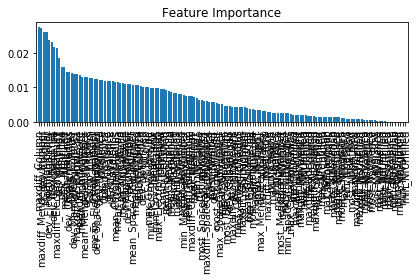

In [12]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" %(f+1, 30, feat_labels[indices[f]], importances[f]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [13]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.01, prefit=True)
X_selected = sfm.transform(X_train)
print("이 임계 조건을 만족하는 샘플의 수: ", X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수:  43


In [31]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" %(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) maxdiff_Column                 0.027390
 2) maxdiff_MendeleevNumber        0.027261
 3) dev_Column                     0.026129
 4) MeanIonicChar                  0.025900
 5) dev_Electronegativity          0.023677
 6) MaxIonicChar                   0.023070
 7) dev_GSvolume_pa                0.021699
 8) maxdiff_Electronegativity      0.021386
 9) dev_MeltingT                   0.018509
10) dev_NUnfilled                  0.015905
11) mean_NUnfilled                 0.015824
12) mean_MeltingT                  0.014535
13) dev_CovalentRadius             0.014444
14) Comp_L2Norm                    0.014064
15) dev_MendeleevNumber            0.013990
16) maxdiff_GSvolume_pa            0.013964
17) maxdiff_NdValence              0.013423
18) mean_AtomicWeight              0.012973
19) mean_MendeleevNumber           0.012904
20) dev_NdValence                  0.012882
21) Comp_L3Norm                    0.012818
22) mean_Number                    0.012816
23) mean_Electronegativity      

std(column number)      0.026129        (3)

std(electronegativity)  0.023677        (5)

std(melting T)          0.018509        (9)

avg(atomic weight)      0.012973        (18)

In [15]:
# 훈련 데이터 정확도
forest.score(X_train, y_train)

0.9988531288079707

In [16]:
# 테스트 데이터 정확도
forest.score(X_test, y_test)

0.9167681688997158

테스트 세트보다 훈련 세트에서 성능이 높기에 과대적합(overfitting)일 가능성이 큼

논문에서는 과대적합에 대한 논란을 피하기 위해 **순차 특성 선택**(sequential feature selection) 알고리즘을 이용하여 관계없는 특성이나 잡음을 제거한 것으로 보임(계산 효율성이 높아지고, 모델의 일반화 오차를 줄일 수 있다)

Fig.2(d)

참고 : 머신러닝 교과서 with 파이썬, 사이킷런, 텐서플로(길벗, 박해선 옮김)

In [12]:
from sbs import *
import sbs1
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

C:\Users\LKLAB\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LKLAB\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\LKLAB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [24]:
forest_reg = RandomForestRegressor(n_estimators=5, max_depth=3, n_jobs=8)
sbs = sbs1.SBS(forest_reg, k_features=1)


In [19]:
sbs.fit(X_train_std, y_train, feat_labels)

Tue Jul 30 19:39:38 2019
START
[Tue Jul 30 19:39:38 2019]Dimension : 20   Count : 01
[Tue Jul 30 19:39:38 2019]Dimension : 20   Count : 02
[Tue Jul 30 19:39:39 2019]Dimension : 20   Count : 03
[Tue Jul 30 19:39:39 2019]Dimension : 20   Count : 04
[Tue Jul 30 19:39:40 2019]Dimension : 20   Count : 05
[Tue Jul 30 19:39:40 2019]Dimension : 20   Count : 06
[Tue Jul 30 19:39:41 2019]Dimension : 20   Count : 07
[Tue Jul 30 19:39:41 2019]Dimension : 20   Count : 08
[Tue Jul 30 19:39:42 2019]Dimension : 20   Count : 09
[Tue Jul 30 19:39:42 2019]Dimension : 20   Count : 10
[Tue Jul 30 19:39:43 2019]Dimension : 20   Count : 11
[Tue Jul 30 19:39:43 2019]Dimension : 20   Count : 12
[Tue Jul 30 19:39:44 2019]Dimension : 20   Count : 13
[Tue Jul 30 19:39:44 2019]Dimension : 20   Count : 14
[Tue Jul 30 19:39:45 2019]Dimension : 20   Count : 15


KeyboardInterrupt: 

In [140]:
forest_reg = RandomForestRegressor(n_estimators=500, max_depth=10)

In [25]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=8,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
forest_reg.score(X_train, y_train)

In [ ]:
forest_reg.score(X_test, y_test)

In [99]:
importances_reg = forest_reg.feature_importances_

In [100]:
indices_reg = np.argsort(importances_reg)[::-1]

 1) dev_GSvolume_pa                0.004483
 2) mean_NUnfilled                 0.013319
 3) dev_SpaceGroupNumber           0.014084
 4) MeanIonicChar                  0.014750
 5) dev_Electronegativity          0.015308
 6) dev_NUnfilled                  0.015136
 7) maxdiff_Electronegativity      0.008577
 8) MaxIonicChar                   0.004392
 9) maxdiff_GSvolume_pa            0.008472
10) maxdiff_MendeleevNumber        0.003853
11) dev_NdValence                  0.000617
12) mean_Electronegativity         0.003767
13) mean_MeltingT                  0.009075
14) frac_dValence                  0.019489
15) Comp_L7Norm                    0.009286
16) Comp_L10Norm                   0.001029
17) Comp_L5Norm                    0.006965
18) Comp_L3Norm                    0.000588
19) max_GSvolume_pa                0.008503
20) mean_NdValence                 0.005009
21) Comp_L2Norm                    0.008510
22) mean_SpaceGroupNumber          0.003623
23) dev_Column                  

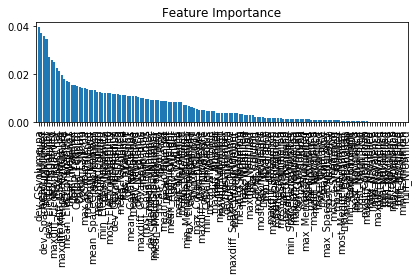

In [123]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" %(f+1, 30, feat_labels[indices_reg[f]], importances_reg[f]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances_reg[indices_reg], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices_reg], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [137]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest_reg, threshold=0.00, prefit=True)
X_selected = sfm.transform(X_train)
print("이 임계 조건을 만족하는 샘플의 수: ", X_selected.shape[1])

이 임계 조건을 만족하는 샘플의 수:  145


 1) dev_GSvolume_pa                0.039540
 2) mean_NUnfilled                 0.036956
 3) dev_SpaceGroupNumber           0.035722
 4) MeanIonicChar                  0.034628
 5) dev_Electronegativity          0.026961
 6) dev_NUnfilled                  0.025809
 7) maxdiff_Electronegativity      0.025019
 8) MaxIonicChar                   0.022681
 9) maxdiff_GSvolume_pa            0.021074
10) maxdiff_MendeleevNumber        0.019489
11) dev_NdValence                  0.018078
12) mean_Electronegativity         0.016886
13) mean_MeltingT                  0.016574
14) frac_dValence                  0.015387
15) Comp_L7Norm                    0.015308
16) Comp_L10Norm                   0.015136
17) Comp_L5Norm                    0.014750
18) Comp_L3Norm                    0.014084
19) max_GSvolume_pa                0.013989
20) mean_NdValence                 0.013753
21) Comp_L2Norm                    0.013319
22) mean_SpaceGroupNumber          0.013229
23) dev_Column                  

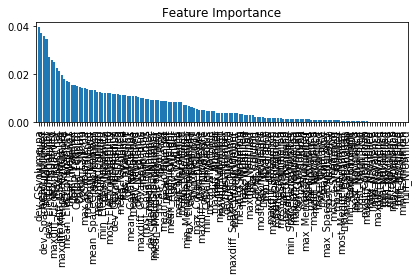

In [134]:
ddd = []
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" %(f+1, 30, feature_set[indices_reg[f]], importances_reg[indices_reg[f]]))
    ddd.append(indices_reg[f])
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances_reg[indices_reg], align='center')
plt.xticks(range(X_train.iloc[ddd].shape[1]), feat_labels[indices_reg], rotation=90)        
plt.xlim([-1, X_train.iloc[ddd].shape[1]])
plt.tight_layout()
plt.show()

In [72]:
forest_reg.random_state

1000

In [23]:
forest_reg.predict(X_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [77]:
feat_labels

Index(['NComp', 'Comp_L2Norm', 'Comp_L3Norm', 'Comp_L5Norm', 'Comp_L7Norm',
       'Comp_L10Norm', 'mean_Number', 'maxdiff_Number', 'dev_Number',
       'max_Number',
       ...
       'max_SpaceGroupNumber', 'min_SpaceGroupNumber', 'most_SpaceGroupNumber',
       'frac_sValence', 'frac_pValence', 'frac_dValence', 'frac_fValence',
       'CanFormIonic', 'MaxIonicChar', 'MeanIonicChar'],
      dtype='object', length=145)

In [78]:
feature_set = [ft for ft in X.columns]

In [106]:
ddd

,dev_GSvolume_pa,mean_NUnfilled,dev_SpaceGroupNumber,MeanIonicChar,dev_Electronegativity,dev_NUnfilled,maxdiff_Electronegativity,MaxIonicChar,maxdiff_GSvolume_pa,maxdiff_MendeleevNumber,...,dev_AtomicWeight,mean_AtomicWeight,dev_Number,mean_Column,mean_NpValence,mean_NpUnfilled,most_MeltingT,min_MendeleevNumber,max_Electronegativity,dev_NpUnfilled
8677,14.826801,2.849976,1.012154e+02,0.339162,1.025952,2.266414,2.55,0.803211,54.485000,80,...,43.910134,59.693600,17.877731,10.941750,1.967190,0.983595,54.800000,7,3.44,0.999731
5494,4.766191,3.058824,7.702422e+01,0.100699,0.366782,1.730104,1.60,0.472708,10.096875,87,...,28.269481,47.901882,11.695502,11.294118,2.352941,1.176471,388.360000,1,2.58,0.968858
315,15.067596,2.714000,2.981972e+01,0.096033,0.360255,1.172448,1.29,0.340336,53.345000,75,...,22.933784,79.992540,8.445600,9.686000,1.200000,1.200000,1090.000000,9,2.18,1.440000
2072,15.624202,1.997651,1.041259e+02,0.325032,0.992005,1.099178,2.55,0.803211,54.485000,78,...,38.049195,51.884793,15.778257,11.617071,2.120595,1.060298,54.800000,9,3.44,0.996364
792,3.003147,3.175676,5.425083e+01,0.082496,0.389331,1.476573,1.08,0.252933,14.830000,40,...,78.704615,98.034241,29.948324,13.666023,3.017375,1.824324,388.360000,48,2.58,0.704372
7758,6.976000,3.400000,1.056000e+01,0.037001,0.214400,0.960000,0.76,0.134459,19.050000,42,...,33.501347,85.180842,12.800000,9.400000,0.800000,1.600000,1511.200000,37,2.01,1.920000
11773,2.569141,4.710526,1.257618e+01,0.047416,0.258947,1.580332,0.98,0.213451,17.030000,67,...,62.383597,76.358879,23.934903,10.052632,1.052632,2.105263,1687.000000,11,2.20,1.994460
5925,0.273266,7.673400,9.564318e+00,0.025039,0.169425,0.546532,0.62,0.091627,1.000000,7,...,13.142192,55.720587,5.465324,4.326600,0.000000,0.000000,1941.000000,43,2.16,0.000000
5190,8.423244,6.086667,1.410667e+01,0.046253,0.274356,1.942222,0.80,0.147856,20.417500,65,...,49.562429,64.561826,19.391111,9.913333,0.913333,3.086667,933.470000,13,1.90,2.057778
7643,5.737778,3.666667,9.555556e+01,0.084761,0.408889,2.222222,0.92,0.190712,12.910000,43,...,12.452667,69.620500,4.888889,12.333333,2.666667,1.333333,494.000000,46,2.55,0.888889


In [94]:
X_train.shape[1]

145

In [1]:
d=indices_reg

NameError: name 'indices_reg' is not defined

In [7]:
X_wine = dfwine.iloc[:,1:].values
y_wine=dfwine.iloc[:,0].values
#XW_train, XW_test, yW_train, yW_test = train_test_split(X_wine, y_wine, test_size=0.3, random_state=0, stratify=y)

In [8]:
XW_train, XW_test, yW_train, yW_test = train_test_split(X_wine, y_wine, test_size=0.3, random_state=0, stratify=y_wine)

In [9]:
stdsc = StandardScaler()

XW_train_std = stdsc.fit_transform(XW_train)
XW_test_std = stdsc.transform(XW_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)


In [11]:
sbs.fit(XW_train_std, yW_train)

<IPython.core.display.Javascript object>


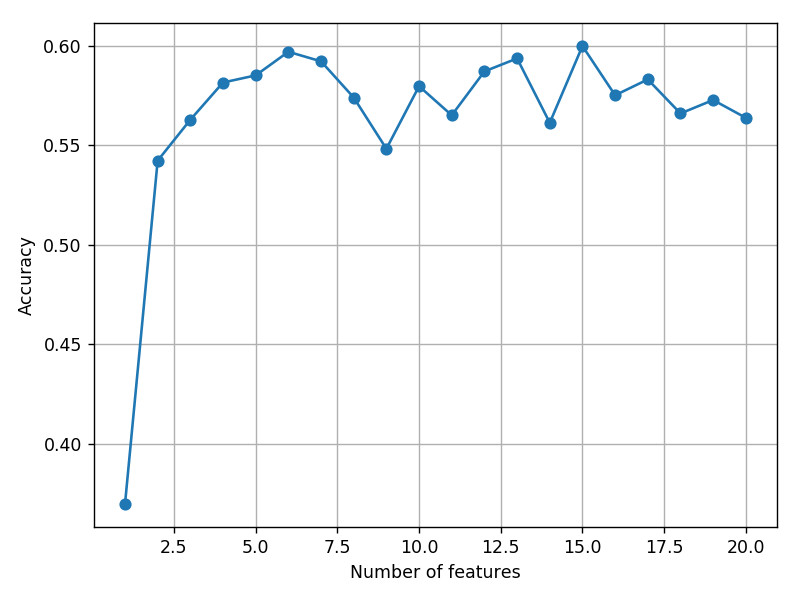

In [16]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker="o")
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

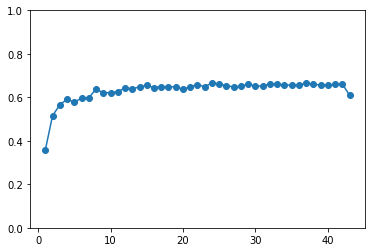

In [25]:

plt.ylim([0.0, 1.0])
plt.plot(k_feat, sbs.scores_, marker="o")

In [21]:
y_pre = sbs.estimator.predict(X_test)

ValueError: Number of features of the model must match the input. Model n_features is 19 and input n_features is 20 

In [22]:
from sklearn.externals import joblib

In [26]:
joblib.dump(forest_reg,'forest_reg.model')

['forest_reg.model']

In [27]:
forest_reg.score(X_test, y_test)

0.5118538382831774

In [28]:
reload = joblib.load('forest_reg.model')

In [29]:
reload.score(X_test, y_test)

0.5118538382831774

In [30]:
sbs.estimator

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=8,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
forest_reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=8,
           oob_score=False, random_state=None, verbose=0, warm_start=False)